# گندله سازی اردکان
بررسی ارتباط پارامترهای ورودی به میکسرهای 
و گندله خروجی

ابتدا توابع مورد نیاز را ایمپورت می کنیم

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import scale , normalize, minmax_scale
from sklearn.neural_network import MLPRegressor


داده های ورودی را که شامل پارامترهای کنسانتره ورودی به میکسر است را وارد می کنیم

In [39]:
i_df=pd.read_csv('input-data.csv')

In [40]:
i_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.0310,0.222000
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.0285,0.223267
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.0272,0.270367
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.0293,0.245033
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.0310,0.213000
...,...,...,...,...,...,...,...,...,...,...
165,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.0250,0.239333
166,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.0270,0.214667
167,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.0270,0.243000
168,1730.000000,67.930000,22.986667,2.900500,0.590500,0.381000,0.531500,0.096500,0.0255,0.242500


داده های گندله خروجی را وارد می کنیم

In [41]:
o_df=pd.read_csv('output-data.csv')

In [42]:
o_df

,PL-CCS kg/pl,PL-Tfe%,PL-FeO%,>16 mm,9-16 mm,6.3-9mm,<6.3 mm,Tumble%,Abrasion%,Porosity%,PL-SiO2%,PL-AL2O3%,PL-P%,PL-MnO%,PL-TiO2%,PL-CaO%,PL-MgO%
0,287,65.46,0.47,8.05,83.25,7.50,1.20,97.28,1.75,20.94,3.55,0.63,0.09,0.03,0.21,0.64,0.42
1,258,65.49,0.53,7.41,88.18,4.00,0.41,96.80,2.39,22.51,3.52,0.65,0.10,0.03,0.22,0.66,0.43
2,298,65.62,0.63,8.47,86.61,4.43,0.49,97.55,2.01,20.90,3.59,0.62,0.09,0.03,0.27,0.62,0.41
3,312,65.66,0.99,5.75,88.81,5.00,0.44,97.75,1.69,19.15,3.68,0.65,0.09,0.03,0.22,0.63,0.42
4,314,65.56,0.89,7.68,88.31,3.47,0.54,97.40,2.00,19.43,3.66,0.61,0.09,0.03,0.21,0.66,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,311,65.73,0.64,8.97,86.64,3.68,0.70,96.79,2.37,21.14,3.42,0.64,0.11,0.03,0.26,0.67,0.45
166,305,65.79,0.59,7.72,87.70,4.09,0.48,97.02,2.29,20.35,3.41,0.64,0.10,0.03,0.28,0.66,0.44
167,305,65.90,0.73,6.35,89.75,3.47,0.43,97.11,2.21,20.60,3.30,0.61,0.10,0.03,0.23,0.61,0.38
168,294,65.92,0.58,5.38,90.02,3.51,1.10,97.61,1.74,21.76,3.27,0.61,0.09,0.03,0.20,0.60,0.39


یکی از ستون های گندله را به انتهای پارامترهای کنسانتره اضافه می کنیم و دیتافریم جدید می سازیم

In [43]:
df=pd.concat([i_df, o_df['PL-Tfe%']], axis=1)

In [44]:
df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,PL-Tfe%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.0310,0.222000,65.46
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.0285,0.223267,65.49
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.0272,0.270367,65.62
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.0293,0.245033,65.66
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.0310,0.213000,65.56
...,...,...,...,...,...,...,...,...,...,...,...
165,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.0250,0.239333,65.73
166,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.0270,0.214667,65.79
167,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.0270,0.243000,65.90
168,1730.000000,67.930000,22.986667,2.900500,0.590500,0.381000,0.531500,0.096500,0.0255,0.242500,65.92


# بررسی اولیه داده ها

دیتاها را نسبت به هم ترسیم می کنیم تا دیدی کلی از داده ها بدست آوریم

<Figure size 1200x800 with 0 Axes>

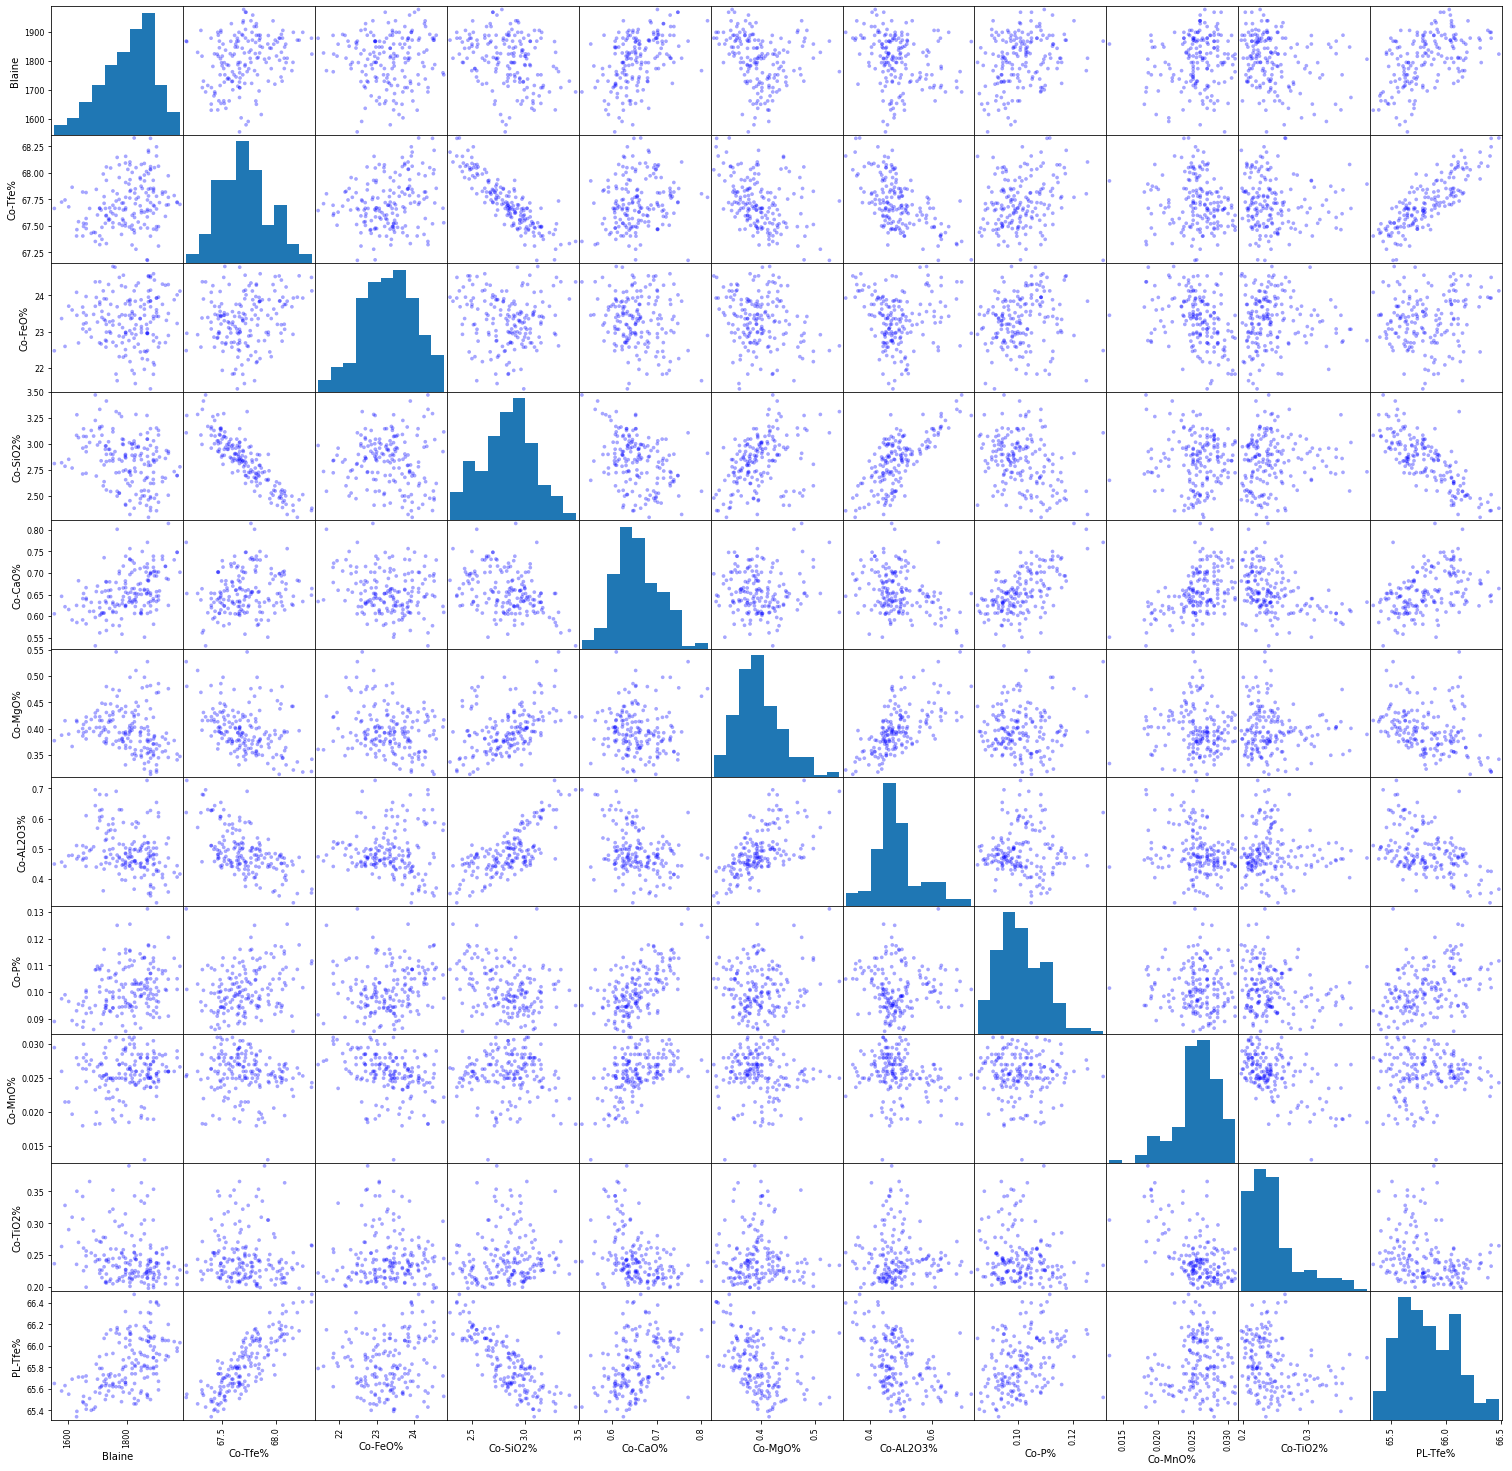

In [45]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

ماتریس ضریب همبستگی دیتاها را محاسبه و ترسیم می کنیم

(11, 11)


<AxesSubplot:>

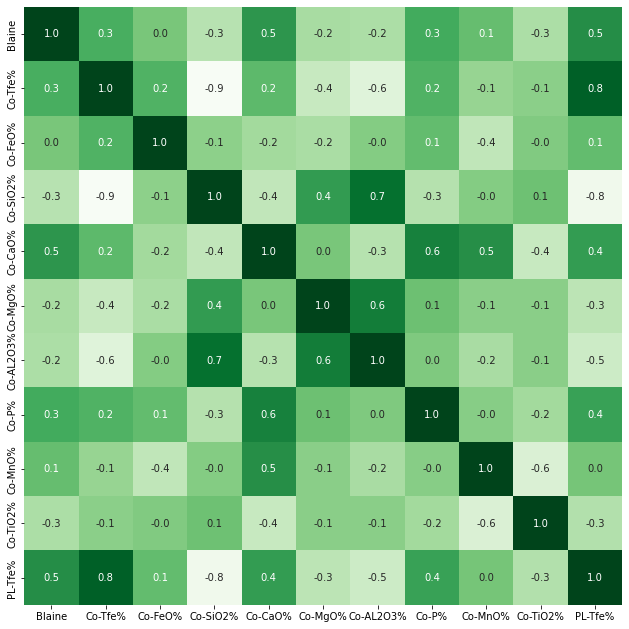

In [46]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# پالایش داده ها

داده های پرت و نویز را شناسایی و از دیتافریم حذف می کنیم

In [47]:
col=df.columns
data=df.values
data.shape

(170, 11)

In [48]:
# identify outliers in the dataset
iso = IsolationForest()
yhat = iso.fit_predict(data)

In [49]:
print(yhat.shape)

(170,)


In [50]:
# select all rows that are not outliers
mask = yhat != -1

In [51]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,

In [52]:
data = data[mask, :]

In [53]:
data.shape

(152, 11)

In [54]:
not_outliers_df=pd.DataFrame(data,columns=col)

In [55]:
not_outliers_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,PL-Tfe%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.031000,0.222000,65.46
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.028500,0.223267,65.49
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.027200,0.270367,65.62
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.029300,0.245033,65.66
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.031000,0.213000,65.56
...,...,...,...,...,...,...,...,...,...,...,...
147,1700.000000,67.603333,23.263333,2.990667,0.669667,0.434667,0.568333,0.109667,0.026667,0.242667,65.69
148,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.025000,0.239333,65.73
149,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.027000,0.214667,65.79
150,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.027000,0.243000,65.90


<Figure size 1200x800 with 0 Axes>

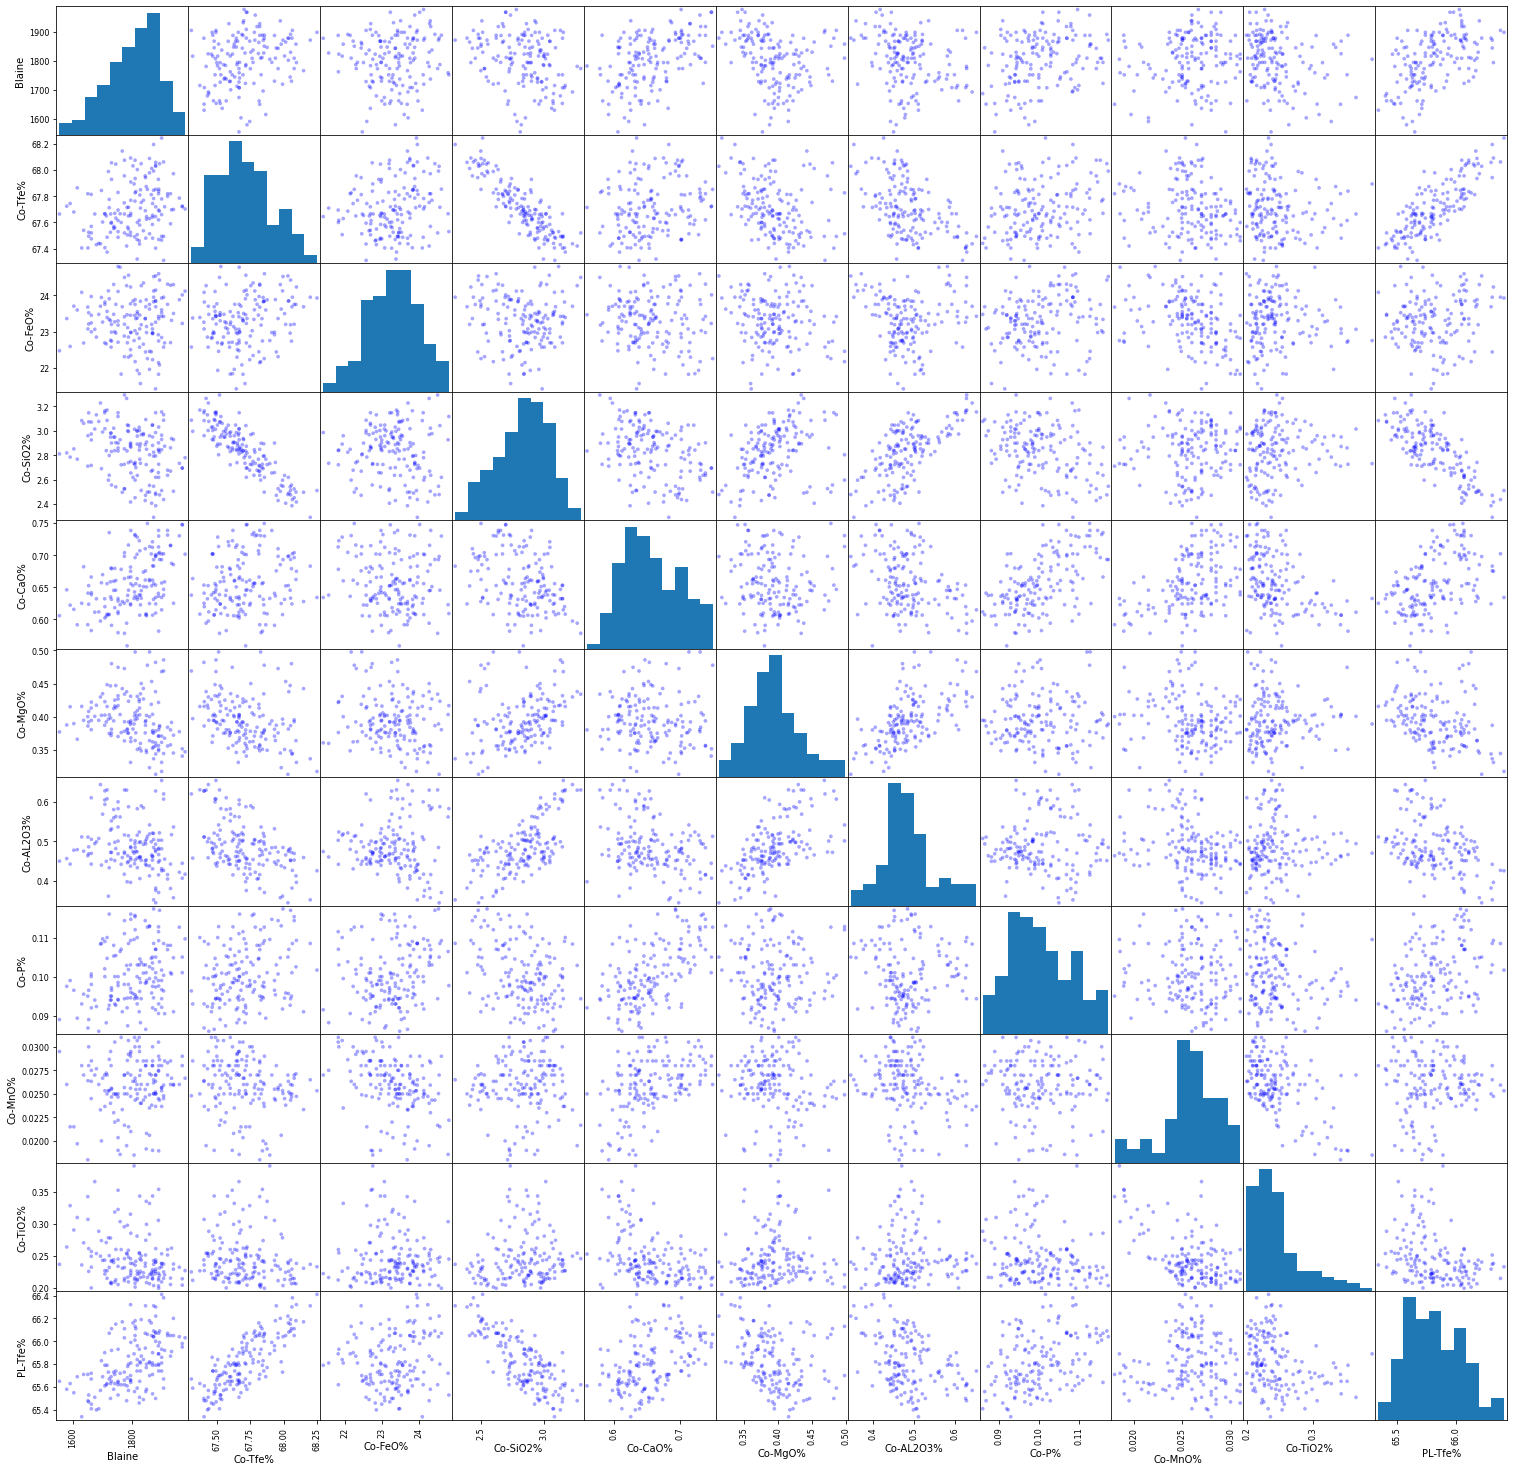

In [56]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(not_outliers_df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

(11, 11)


<AxesSubplot:>

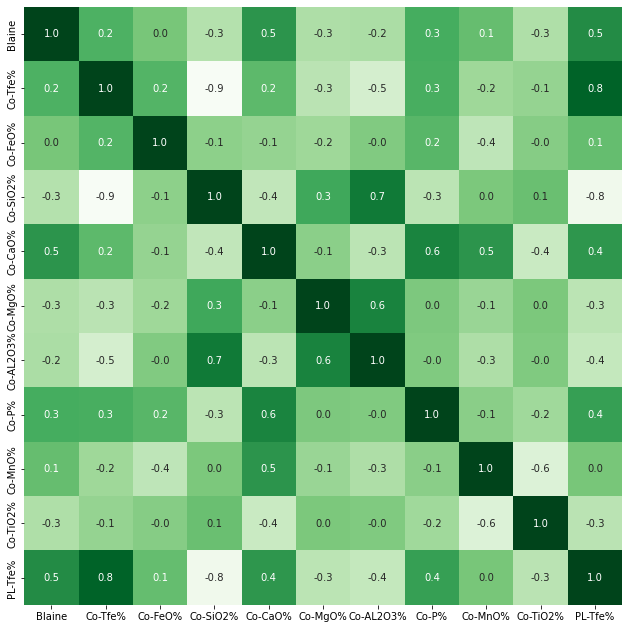

In [57]:
corr = not_outliers_df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# نرمالسازی داده ها

In [58]:
data=normalize(data,norm='l1',axis=0)

In [59]:
normal_df=pd.DataFrame(data,columns=col)

In [60]:
normal_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,PL-Tfe%
0,0.006657,0.006554,0.006444,0.007040,0.006392,0.007103,0.006726,0.005957,0.007896,0.005934,0.006543
1,0.006708,0.006562,0.006398,0.006898,0.006749,0.007379,0.006661,0.006605,0.007259,0.005968,0.006546
2,0.006252,0.006573,0.006400,0.006596,0.006061,0.006537,0.006083,0.005771,0.006928,0.007227,0.006559
3,0.006551,0.006573,0.006355,0.006738,0.006236,0.007184,0.006576,0.006190,0.007463,0.006550,0.006563
4,0.006600,0.006557,0.006621,0.007002,0.006439,0.006686,0.006000,0.006175,0.007896,0.005694,0.006553
...,...,...,...,...,...,...,...,...,...,...,...
147,0.006207,0.006568,0.006569,0.006950,0.006710,0.007247,0.007691,0.007178,0.006792,0.006487,0.006566
148,0.006343,0.006564,0.006629,0.006853,0.006606,0.006564,0.007565,0.007069,0.006368,0.006398,0.006570
149,0.006262,0.006557,0.006652,0.007170,0.006569,0.007475,0.008214,0.006851,0.006877,0.005738,0.006576
150,0.006233,0.006575,0.006408,0.007316,0.006332,0.006453,0.008174,0.006677,0.006877,0.006496,0.006587


<Figure size 1200x800 with 0 Axes>

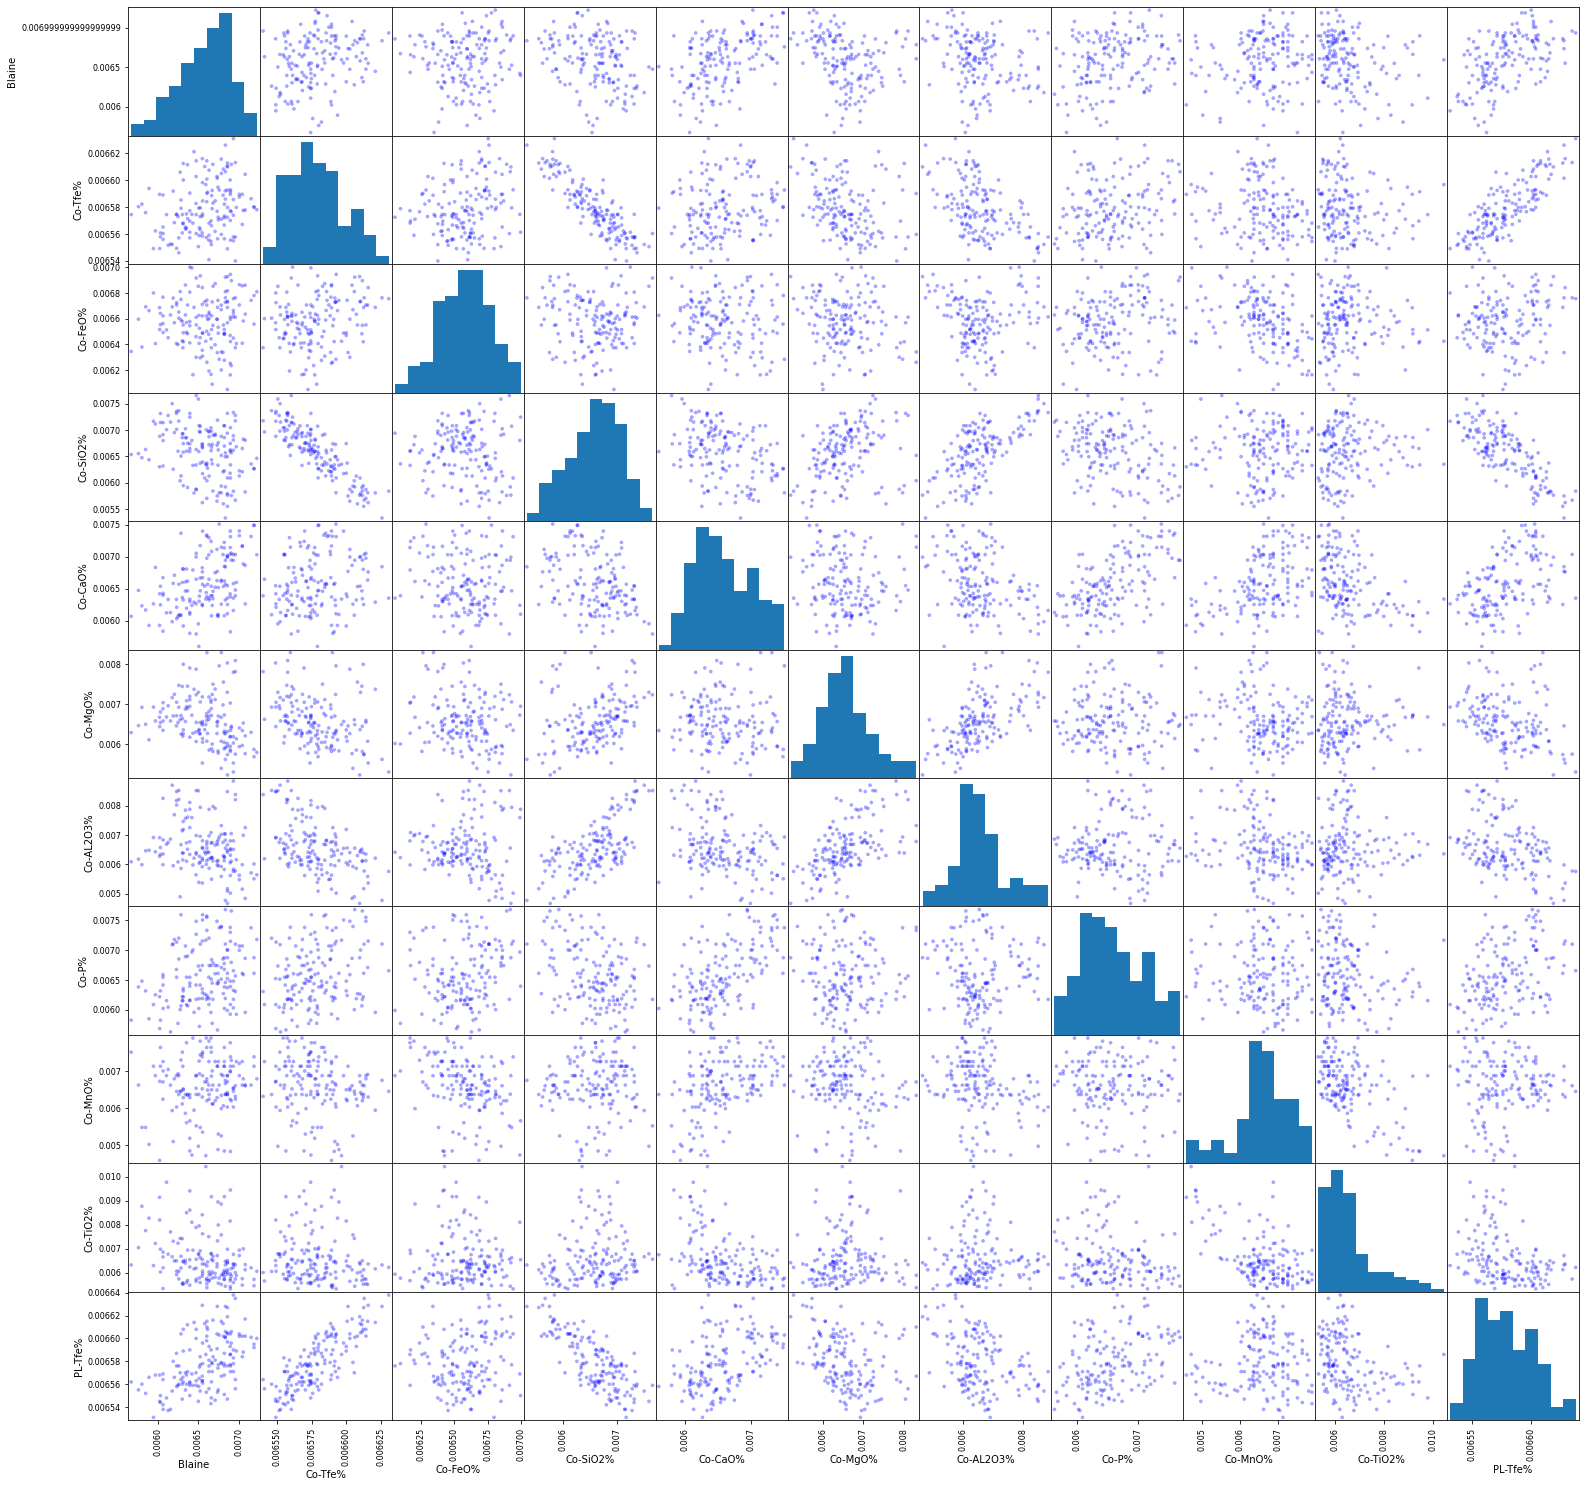

In [61]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(normal_df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

(11, 11)


<AxesSubplot:>

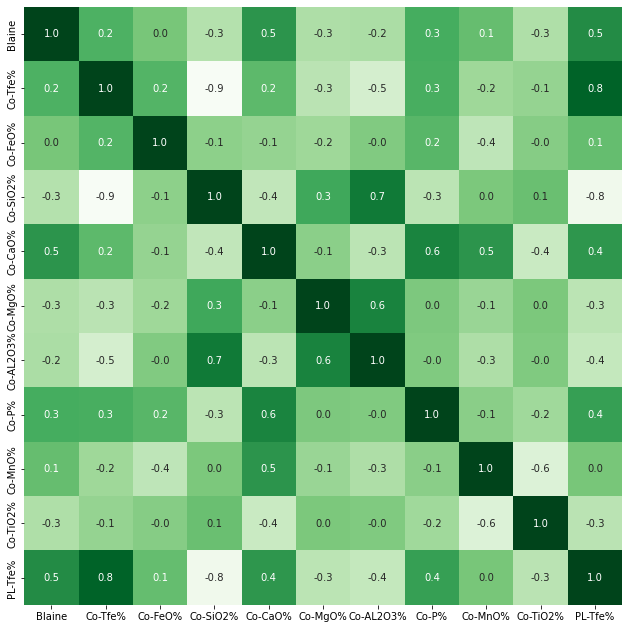

In [62]:
corr = normal_df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# جداسازی داده های آموزشی و تست

In [63]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [64]:
X

array([[0.00665731, 0.00655446, 0.00644377, ..., 0.00595662, 0.00789618,
        0.00593422],
       [0.00670843, 0.00656191, 0.00639765, ..., 0.00660465, 0.00725939,
        0.00596808],
       [0.00625203, 0.00657292, 0.00639953, ..., 0.00577116, 0.00692826,
        0.00722709],
       ...,
       [0.00626177, 0.00655705, 0.00665179, ..., 0.00685121, 0.00687732,
        0.00573819],
       [0.00623256, 0.00657454, 0.006408  , ..., 0.00667665, 0.00687732,
        0.00649556],
       [0.00631654, 0.00660012, 0.00649083, ..., 0.00631664, 0.00649524,
        0.0064822 ]])

In [65]:
y

array([0.00654306, 0.00654605, 0.00655905, 0.00656305, 0.00655305,
       0.00655405, 0.00656505, 0.00655905, 0.00656804, 0.00656305,
       0.00657004, 0.00657004, 0.00656405, 0.00655305, 0.00656704,
       0.00655805, 0.00656005, 0.00656205, 0.00656205, 0.00654805,
       0.00654406, 0.00655005, 0.00653806, 0.00653706, 0.00653106,
       0.00653806, 0.00654805, 0.00654206, 0.00654505, 0.00655205,
       0.00655505, 0.00656005, 0.00656605, 0.00656804, 0.00658004,
       0.00656405, 0.00656105, 0.00656205, 0.00656005, 0.00654705,
       0.00655505, 0.00655105, 0.00656105, 0.00656305, 0.00657904,
       0.00659303, 0.00657104, 0.00657404, 0.00658604, 0.00659303,
       0.00657604, 0.00657804, 0.00657704, 0.00658604, 0.00658604,
       0.00658704, 0.00657804, 0.00657804, 0.00657604, 0.00658903,
       0.00657604, 0.00657704, 0.00657804, 0.00657904, 0.00657804,
       0.00658404, 0.00656804, 0.00656605, 0.00655605, 0.00657504,
       0.00657104, 0.00656804, 0.00657104, 0.00658304, 0.00659

In [66]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# استفاده از مدل رگرسیون خطی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [67]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# evaluate the model
yhat = model.predict(X_test)

In [69]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

MAE: 0.000


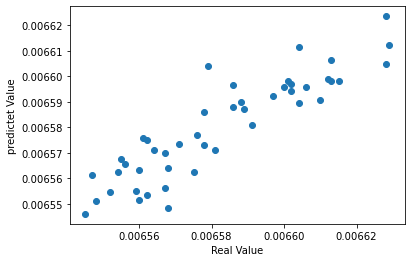

In [70]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [71]:
print("The Predict Score is ", (r2_score( y_test,yhat)))


The Predict Score is  0.7921313446167223


# استفاده از شبکه عصبی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [80]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation="relu" ,random_state=1, max_iter=2000)
model.fit(X_train, y_train)


MLPRegressor(max_iter=2000, random_state=1)

In [81]:
# evaluate the model
yhat = model.predict(X_test)

In [82]:
print("The Train Score is: ", (r2_score( y_test,yhat)))

The Train Score is:  -2477680.8888491862


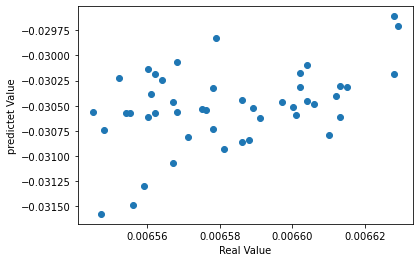

In [83]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()